Prediction d'une insufisance  cardiaque chez un patient
- age: âge en années
- sexe: (M = homme ; 1 = femme)
- ChestPainType:  type de douleur thoracique
    - 0 : Angine typique : douleur thoracique liée à une diminution de l'apport sanguin au cœur.
    - 1 : Angine atypique : douleur thoracique non liée au cœur
    - 2 : Douleur non angineuse : généralement des spasmes oesophagiens (non liés au cœur)
    - 3 : Asymptomatique : douleur thoracique ne montrant pas de signes de maladie.
    
- RestingBP : pression artérielle au repos (en mm Hg à l'admission à l'hôpital) : toute valeur supérieure à 130-140 est généralement préoccupante.
- Cholesterol : - cholestérol sérique en mg/dl.
    - sérum = LDL + HDL + 0,2 * triglycérides au-dessus de 200, il faut s'inquiéter
- FastingBS:  (glycémie à jeun > 120 mg/dl) (1 = vrai ; 0 = faux)
    - Un taux de glycémie à jeun >126 mg/dl est un signe de diabète.
  
- RestingECG : résultats électrocardiographiques au repos
    - 0 : Rien à noter
    - 1 : Anomalie de l'onde ST-T
        - peut aller de symptômes légers à des problèmes graves
        - signale un rythme cardiaque anormal
    - 2 : hypertrophie ventriculaire gauche possible ou certaine
        - hypertrophie de la principale chambre de pompage du cœur
- MaxHR : fréquence cardiaque maximale atteinte
- ExerciseAngina : angine de poitrine induite par l'exercice (1 = oui ; 0 = non)
- Oldpeak - dépression du segment ST induite par l'exercice par rapport au repos examine le stress du cœur pendant l'exercice ; un cœur en mauvaise santé sera plus stressé.
- ST_Slope : la pente du segment ST de pointe à l'effort
    - 0 : Pente ascendante : meilleure fréquence cardiaque avec l'exercice (rare)
    - 1 : Pente plate : changement minime (cœur sain typique)
    - 2 : Pente descendante : signes d'un cœur en mauvaise santé
- HeartDisease - have disease or not (1=yes, 0=no) (= the predicted attribute)



In [1]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sketch
import duckdb

In [3]:
# DuckDB est un système de gestion de base de données SQL OLAP in-process
# on peut requeter sur le dataframe
con = duckdb.connect()
df=con.execute("""SELECT * from '*.csv'""").df()
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
# interaction avec le dataframe
df.sketch.ask("peut tu me donner une description de chaque colone en une phrase en français?'(format output html)")

## ARBRE DE DECISION
### CART
Pourquoi CART ?
- chaid : 
  - Variable à prédire, c'est-à-dire variable dépendante : continue OU catégorielle

  - Variables indépendantes : catégorielles UNIQUEMENT (il peut y avoir plus de 2 catégories)
- Cart: 
  - Variable à prédire, c'est-à-dire variable dépendante : catégorielle (binaire)

  - Variables indépendantes : Continu OU Catégorique (binaire)

source : https://towardsdatascience.com/clearly-explained-top-2-types-of-decision-trees-chaid-cart-8695e441e73e

In [5]:
from chefboost import Chefboost as cb

In [6]:
# l'algo de cart voyait la target comme une variable continue
df['HeartDisease'] = df['HeartDisease'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [7]:
config = {'algorithm': 'CART'}
tree = cb.fit(df.copy(),config,target_label = 'HeartDisease')

[INFO]:  4 CPU cores will be allocated in parallel running
CART  tree is going to be built...
-------------------------
finished in  21.21163010597229  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  98.47494553376906 % on  918  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[401, 5], [9, 503]]
Precision:  98.7685 %, Recall:  97.8049 %, F1:  98.2843 %


l'algorithme arrive à trouver une logique pour 98 % des données

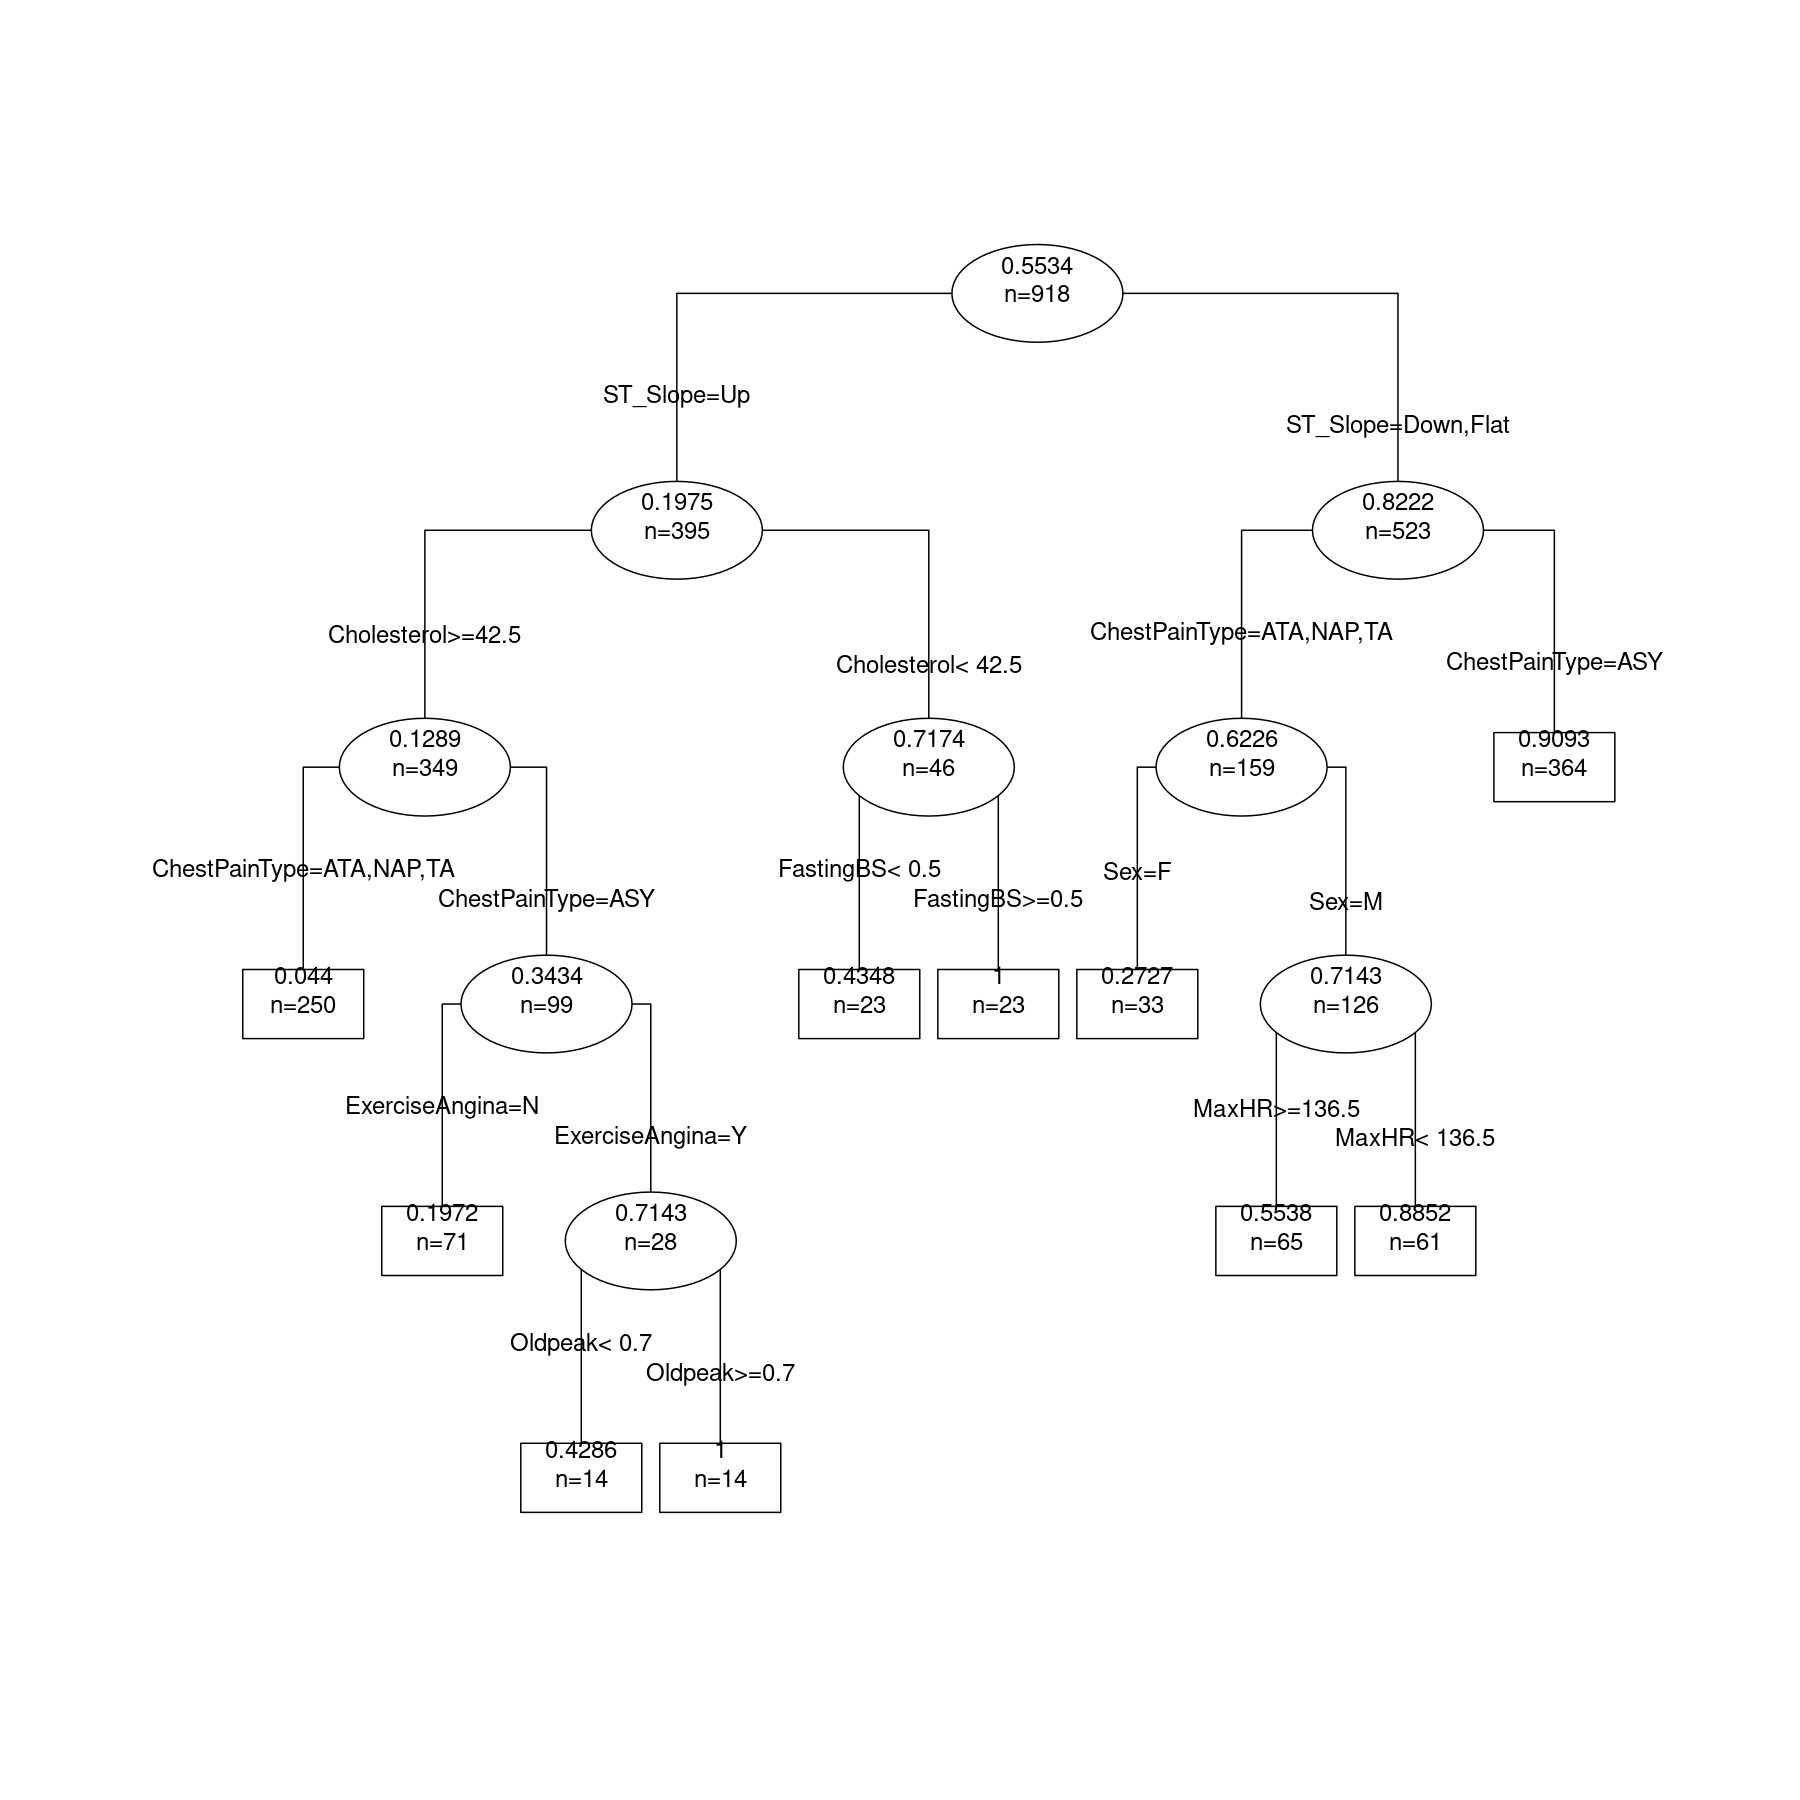

In [8]:
df['HeartDisease'] = df['HeartDisease'].apply(lambda x: 1 if x == 'Yes' else 0)

## Résolution du problème 

### Exploration des données

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:>

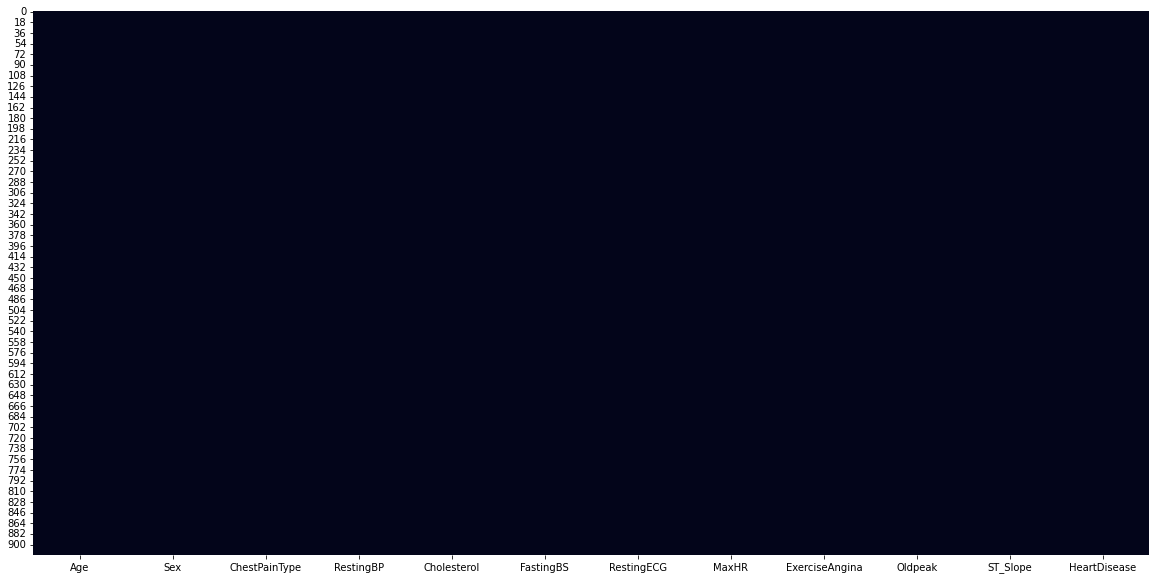

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [12]:
# proporion de na pour chaque colonne
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

In [13]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

Sex----------------------------------------------- ['M' 'F']
ChestPainType------------------------------------- ['ATA' 'NAP' 'ASY' 'TA']
RestingECG---------------------------------------- ['Normal' 'ST' 'LVH']
ExerciseAngina------------------------------------ ['N' 'Y']
ST_Slope------------------------------------------ ['Up' 'Flat' 'Down']


In [14]:
for col in df.select_dtypes('object'):
    print(f'{col}\n{df[col].value_counts()}\n')

Sex
M    725
F    193
Name: Sex, dtype: int64

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

RestingECG
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64

ST_Slope
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64



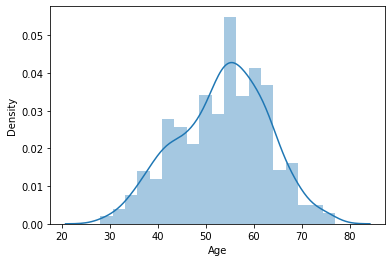

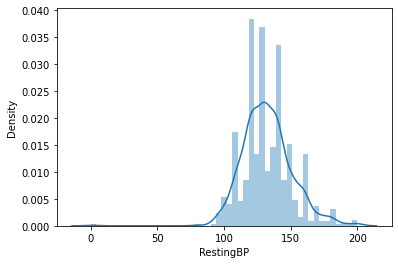

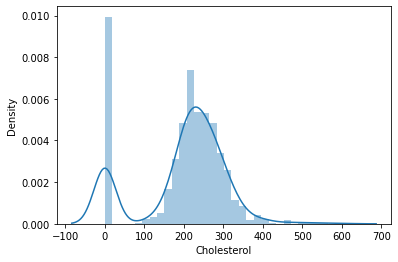

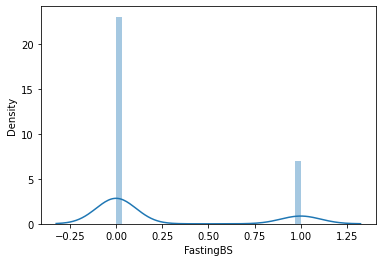

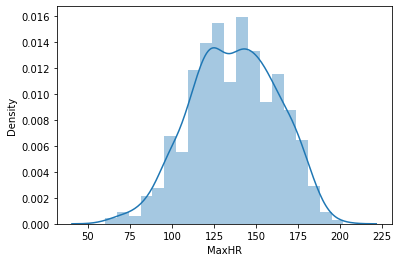

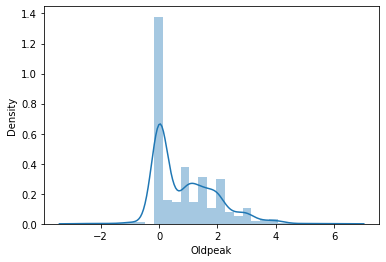

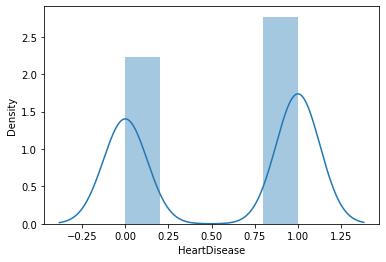

In [15]:
for col in df.select_dtypes(['float','int64']):
    plt.figure()
    sns.distplot(df[col])

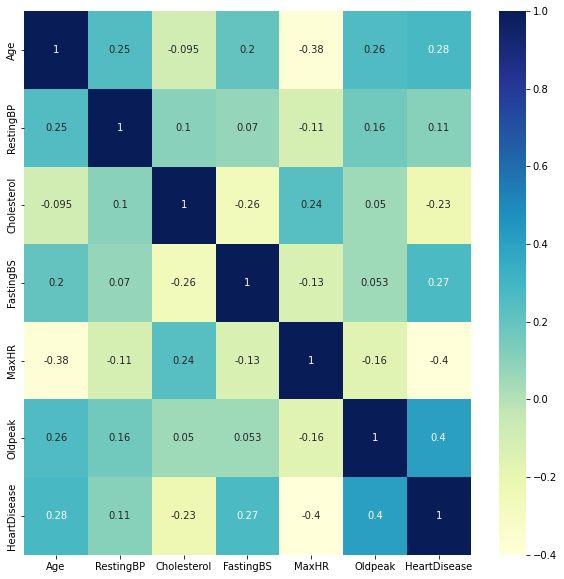

In [16]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap="YlGnBu", ax=ax)
plt.show()

In [17]:
df.corr()['HeartDisease'].sort_values()

MaxHR          -0.400421
Cholesterol    -0.232741
RestingBP       0.107589
FastingBS       0.267291
Age             0.282039
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

In [18]:
heart_disease = df[df['HeartDisease'] == 1]
normal_heart = df[df['HeartDisease'] == 0]

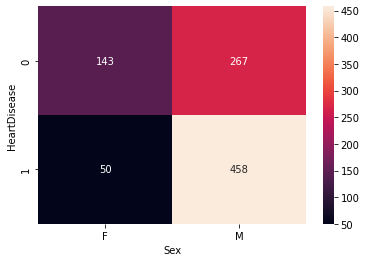

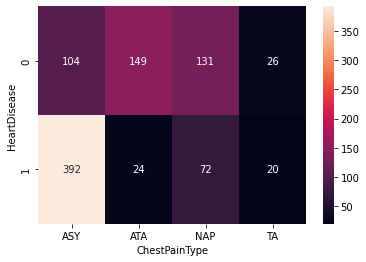

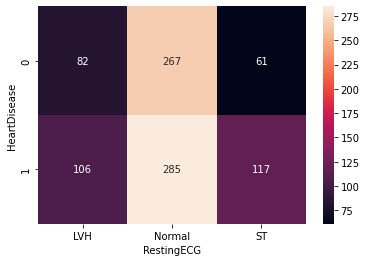

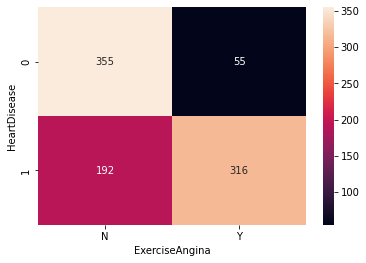

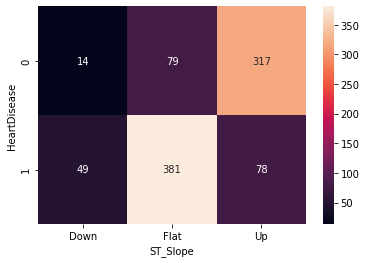

In [19]:
for col in df.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(df['HeartDisease'], df[col]), annot=True, fmt='d')

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


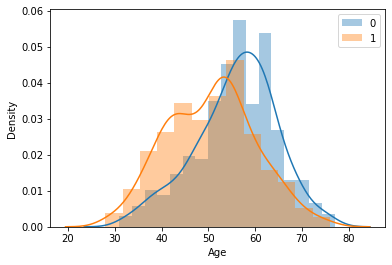

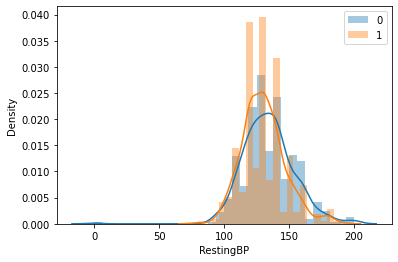

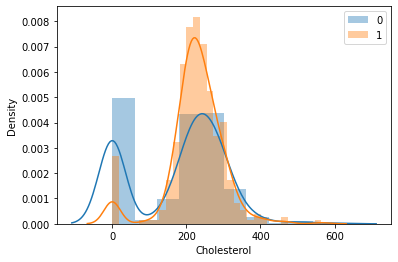

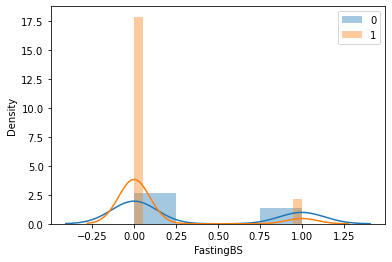

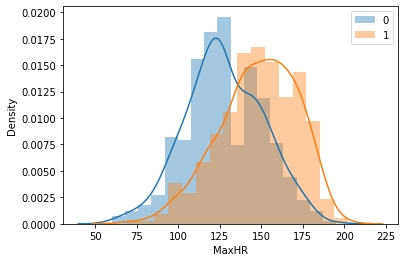

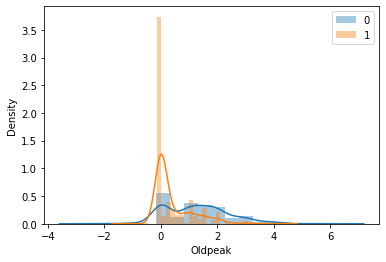

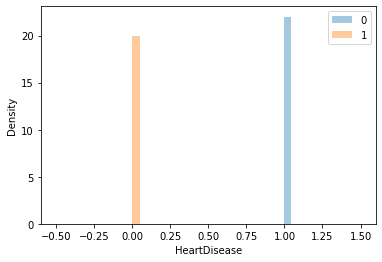

In [20]:
for col in df.select_dtypes(['float','int64']):
    plt.figure()
    sns.distplot(heart_disease[col], label='0')
    sns.distplot(normal_heart[col], label='1')
    plt.legend()

### hypotheses nulle (H0): 

- Les individus atteints d'une insufisance cardiaque ont des taux de RestingBP, Cholesterol, MaxHR et Oldpeak significativement différents
    - H0 = Les taux  sont ÉGAUX chez les individus malades et  et non malade.

    - H1 = Les taux  sont significativement différents chez les individus malades et  et non malade.


In [21]:
from scipy.stats import ttest_ind

In [22]:
# test de student pour les moyennes de deux échantillons indépendants
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(heart_disease[col].dropna(), normal_heart[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [23]:
for col in df.select_dtypes(['float','int64']):
    print(f'{col :-<50} {t_test(col)}')

Age----------------------------------------------- H0 Rejetée
RestingBP----------------------------------------- H0 Rejetée
Cholesterol--------------------------------------- H0 Rejetée
FastingBS----------------------------------------- H0 Rejetée
MaxHR--------------------------------------------- H0 Rejetée
Oldpeak------------------------------------------- H0 Rejetée
HeartDisease-------------------------------------- H0 Rejetée


## conclusion

- on a 1 colone de type float, 5 de type int et 6 de type objet
- il n'y a pas de valeurs manquantes dans notre dataframe
- la variable target n'est pas déséquilibré et contient 2 classes.
- certaine variable independantes categorielle sont fortement désiquilibrées:
    - sex : 725 M vs 193 F
    - ST_Slope : Flat 460  VS  Down 63
    - ChestPainType: ASY  496  VS  TA  46
- Il y'a une certaine correlation entre Age, Oldpeak et HeartDisease.
- Les individus atteints d'une insufisance cardiaque ont des taux de RestingBP, Cholesterol, MaxHR et Oldpeak significativement différents

## Preprocessing

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
from sklearn.preprocessing import RobustScaler

In [25]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [26]:
# variables categorielles sauf la target
categorical_cols= df.select_dtypes('object').columns
categorical_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [27]:
enc = OneHotEncoder(handle_unknown='ignore')
transformed_trainset = enc.fit_transform(trainset[categorical_cols]).toarray()
transformed_testset = enc.transform(testset[categorical_cols]).toarray()
# the above transformed_data is an array so convert it to dataframe
encoded_data_trainset = pd.DataFrame(transformed_trainset, index=trainset.index)
encoded_data_testset = pd.DataFrame(transformed_testset, index=testset.index)

# now concatenate the original data and the encoded data using pandas
trainset = pd.concat([trainset, encoded_data_trainset], axis=1)
trainset = trainset.drop(categorical_cols,axis=1)
  

testset = pd.concat([testset, encoded_data_testset], axis=1)
testset=testset.drop(categorical_cols,axis=1)  

In [28]:
X_train = trainset.drop('HeartDisease', axis=1)
y_train = trainset['HeartDisease']

X_test = testset.drop('HeartDisease', axis=1)
y_test = testset['HeartDisease']

## Modelisation

In [155]:
import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingRegressor
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve,GridSearchCV,RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [166]:
RandomForest=RandomForestClassifier(random_state=0)
KNN=make_pipeline(RobustScaler(),KNeighborsClassifier())
Logistic_Regression=make_pipeline(RobustScaler(),LogisticRegression())

In [167]:
dict_of_models = {'RandomForest':RandomForest,
                'KNN':KNN,
                'LogisticRegression':Logistic_Regression,
                 }

In [158]:
def evaluation(model):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    print("Temps d'entraînement :", training_time, "secondes.")
    
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))


RandomForest
Temps d'entraînement : 0.32224106788635254 secondes.
[[62 15]
 [11 96]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        77
           1       0.86      0.90      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184

KNN
Temps d'entraînement : 0.008995532989501953 secondes.
[[63 14]
 [ 8 99]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        77
           1       0.88      0.93      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184

LogisticRegression
Temps d'entraînement : 0.022510290145874023 secondes.
[[56 21]
 [11 96]]
              precision    recall  f1-score   support

           0       0.84      0.73    

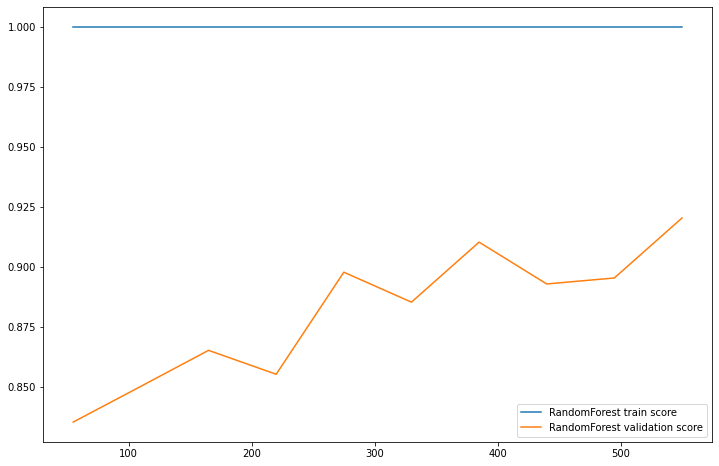

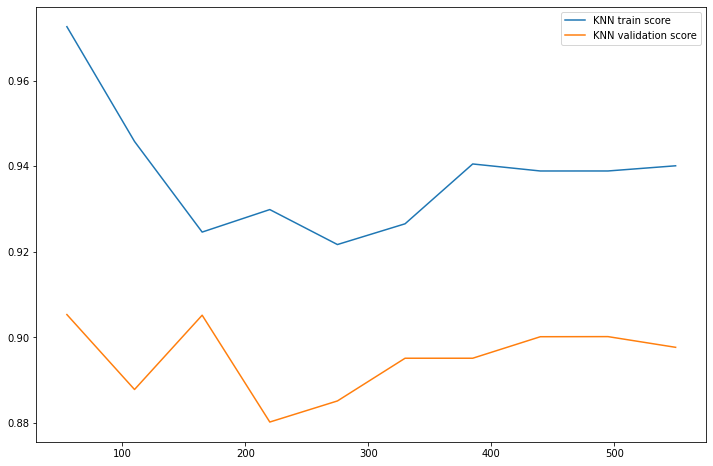

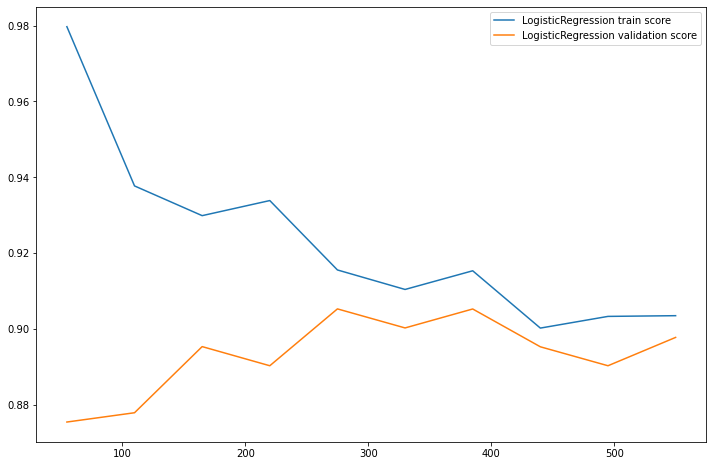

In [159]:
# evaluation des model avec learning curve
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='recall',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label= f'{name} train score')
    plt.plot(N, val_score.mean(axis=1), label=f'{name} validation score')
    plt.legend()

- Accuracy: indique le pourcentage de bonnes prédictions c-à-d rapport entre le nombre total de prédictions correctes et le nombre total de prédictions. (TP+TN)/Total.
- Precision : rapport entre les vrais positifs et tous les positifs TP/(TP+FP)   "impact FP"
- Recall : mesure de notre modèle identifiant correctement les Vrais Positifs TP/(TP+FN) "impact FN"
- il est plus important d'obtenir un rappel élevé que d'obtenir une précision élevée - nous aimerions détecter autant de patients cardiaques que possible.
- le rappel nous indique combien nous avons correctement identifié comme ayant une maladie cardiaque.

## Courbe ROC KNN

In [273]:
from sklearn.metrics import roc_auc_score, roc_curve

In [274]:
KNN.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

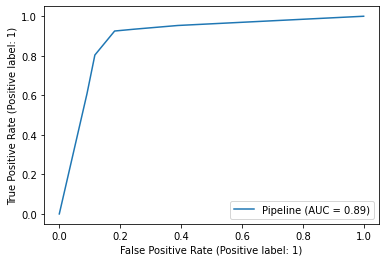

In [275]:
from sklearn import metrics
from matplotlib import pyplot as plt

metrics.plot_roc_curve(KNN, X_test, y_test)

In [276]:
ypred = KNN.predict(X_test)

In [277]:
#Calculez la zone sous la courbe (ROC AUC)
val_auc = roc_auc_score(y_test, y_pred)
print(f"{val_auc: .3f}")

 0.812


In [278]:
precisions, rappels, seuils = precision_recall_curve(y_test, y_pred)
# precisions et rappels ont un point supplementaire final egal resp. a 1 et 0, sans seuil
precisions = precisions[:-1]
rappels = rappels[:-1]

condition = rappels + precisions > 0
precisions = precisions[condition]
rappels = rappels[condition]
seuils = seuils[condition]

f1_scores = 2 * rappels * precisions/(rappels + precisions)

val_seuil = seuils[np.argmax(f1_scores)]

print("Meilleur seuil : ", val_seuil)

Meilleur seuil :  1


In [279]:
print(confusion_matrix(y_test, y_pred >= val_seuil))

[[56 21]
 [11 96]]


In [280]:
print(classification_report(y_test, y_pred >= val_seuil))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        77
           1       0.82      0.90      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.81      0.82       184
weighted avg       0.83      0.83      0.82       184



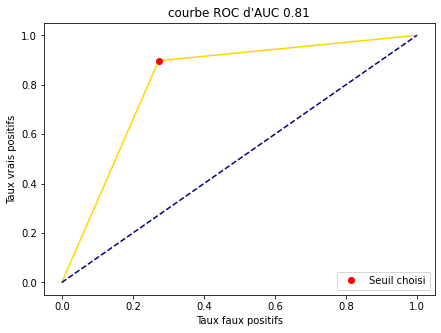

In [228]:
#calcule le recall pour chaque classe en utilisant le seuil de classification optimal
#Le seuil de classification optimal est déterminé en choisissant la valeur de
# seuil à partir de laquelle la somme des faux positifs et des faux négatifs est minimale
# ligne bleutaux de vrais positifs et de faux positifs d'un classificateur aléatoire.
un_moins_spec, sens, seuil = roc_curve(y_test, y_pred)

recall_0 = 1 - un_moins_spec[sum(seuil>val_seuil)]
recall_1 = sens[sum(seuil>val_seuil)]

plt.figure(figsize=(7, 5))
sns.lineplot(un_moins_spec, sens, estimator=None, color = "gold")
plt.title(f"courbe ROC d'AUC {round(val_auc,2)}")
plt.plot([0,1], [0,1], color = 'navy', linestyle = '--')
plt.plot(1 - recall_0, recall_1,'ro',label='Seuil choisi'); plt.legend();

plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.legend(loc="lower right")
plt.show()

## Courbe ROC RandomForest

In [281]:
RandomForest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

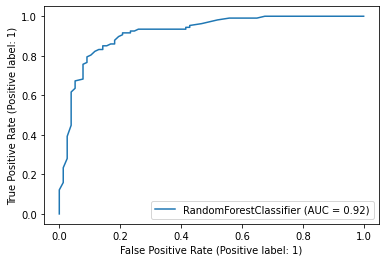

In [282]:
metrics.plot_roc_curve(RandomForest, X_test, y_test)

In [283]:
y_pred = RandomForest.predict(X_test)

In [284]:
val_auc = roc_auc_score(y_test, y_pred)
print(f"{val_auc: .3f}")

 0.851


In [285]:
precisions, rappels, seuils = precision_recall_curve(y_test, y_pred)
# precisions et rappels ont un point supplementaire final egal resp. a 1 et 0, sans seuil
precisions = precisions[:-1]
rappels = rappels[:-1]

condition = rappels + precisions > 0
precisions = precisions[condition]
rappels = rappels[condition]
seuils = seuils[condition]

f1_scores = 2 * rappels * precisions/(rappels + precisions)

val_seuil = seuils[np.argmax(f1_scores)]

print("Meilleur seuil : ", val_seuil)

Meilleur seuil :  1


In [286]:
print(confusion_matrix(y_test, y_pred >= val_seuil))

[[62 15]
 [11 96]]


In [287]:
print(classification_report(y_test, y_pred >= val_seuil))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        77
           1       0.86      0.90      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



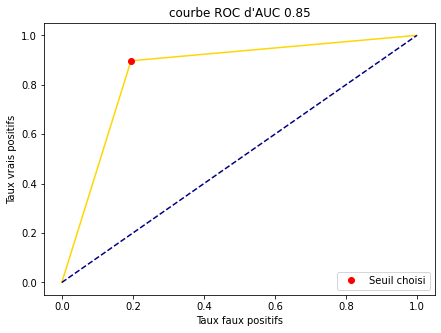

In [288]:
#calcule le recall pour chaque classe en utilisant le seuil de classification optimal
#Le seuil de classification optimal est déterminé en choisissant la valeur de
# seuil à partir de laquelle la somme des faux positifs et des faux négatifs est minimale
# ligne bleutaux de vrais positifs et de faux positifs d'un classificateur aléatoire.
un_moins_spec, sens, seuil = roc_curve(y_test, y_pred)

recall_0 = 1 - un_moins_spec[sum(seuil>val_seuil)]
recall_1 = sens[sum(seuil>val_seuil)]

plt.figure(figsize=(7, 5))
sns.lineplot(un_moins_spec, sens, estimator=None, color = "gold")
plt.title(f"courbe ROC d'AUC {round(val_auc,2)}")
plt.plot([0,1], [0,1], color = 'navy', linestyle = '--')
plt.plot(1 - recall_0, recall_1,'ro',label='Seuil choisi'); plt.legend();

plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.legend(loc="lower right")
plt.show()

## Courbe ROC Logistic regression

In [289]:
Logistic_Regression.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logisticregression', LogisticRegression())])

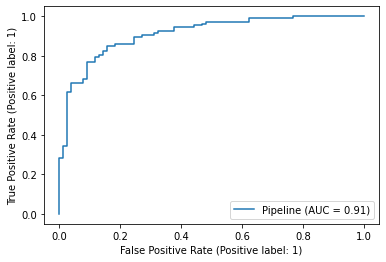

In [290]:
metrics.plot_roc_curve(Logistic_Regression, X_test, y_test)

In [291]:
y_pred = Logistic_Regression.predict(X_test)

In [292]:
val_auc = roc_auc_score(y_test, y_pred)
print(f"{val_auc: .3f}")

 0.812


In [293]:
precisions, rappels, seuils = precision_recall_curve(y_test, y_pred)
# precisions et rappels ont un point supplementaire final egal resp. a 1 et 0, sans seuil
precisions = precisions[:-1]
rappels = rappels[:-1]

condition = rappels + precisions > 0
precisions = precisions[condition]
rappels = rappels[condition]
seuils = seuils[condition]

f1_scores = 2 * rappels * precisions/(rappels + precisions)

val_seuil = seuils[np.argmax(f1_scores)]

print("Meilleur seuil : ", val_seuil)

Meilleur seuil :  1


In [294]:
print(confusion_matrix(y_test, y_pred >= val_seuil))

[[56 21]
 [11 96]]


In [295]:
print(classification_report(y_test, y_pred >= val_seuil))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        77
           1       0.82      0.90      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.81      0.82       184
weighted avg       0.83      0.83      0.82       184



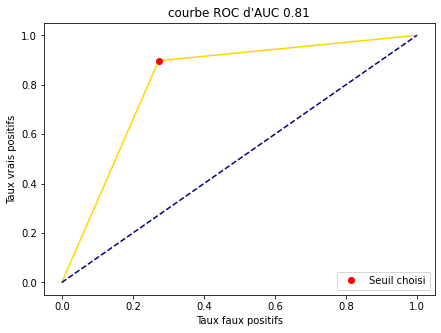

In [296]:
#calcule le recall pour chaque classe en utilisant le seuil de classification optimal
#Le seuil de classification optimal est déterminé en choisissant la valeur de
# seuil à partir de laquelle la somme des faux positifs et des faux négatifs est minimale
# ligne bleutaux de vrais positifs et de faux positifs d'un classificateur aléatoire.
un_moins_spec, sens, seuil = roc_curve(y_test, y_pred)

recall_0 = 1 - un_moins_spec[sum(seuil>val_seuil)]
recall_1 = sens[sum(seuil>val_seuil)]

plt.figure(figsize=(7, 5))
sns.lineplot(un_moins_spec, sens, estimator=None, color = "gold")
plt.title(f"courbe ROC d'AUC {round(val_auc,2)}")
plt.plot([0,1], [0,1], color = 'navy', linestyle = '--')
plt.plot(1 - recall_0, recall_1,'ro',label='Seuil choisi'); plt.legend();

plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.legend(loc="lower right")
plt.show()

## Conclusion

Meilleur : 
- temps d'execution : KNN (0.0089)
- recall : KNN (0.93) 
- precision: KNN (0.88)
- Accuracy: KNN (0.88)
- AUC : RandomForest (0.85) vs KNN(0.81)


ROC : On obtient une valeur de 0,85 comme AUC, ce qui est un assez bon score ! En termes simples, cela signifie que le modèle peut distinguer les patients atteints de maladies cardiaques et ceux qui n'en ont pas à 85 % du temps

En médecine, il est difficile de dire que l'une des deux métriques, précision ou rappel (recall), est plus importante que l'autre en machine learning, car cela dépend du contexte et des objectifs de l'application.

La précision mesure la proportion de résultats positifs qui sont réellement positifs, c'est-à-dire la capacité du modèle à identifier correctement les vrais positifs parmi toutes les prédictions positives. La précision est importante dans les cas où les faux positifs ont des conséquences importantes, par exemple, lorsque le coût d'un traitement inutile est élevé.

Le rappel, quant à lui, mesure la proportion de résultats positifs qui sont correctement identifiés, c'est-à-dire la capacité du modèle à identifier tous les vrais positifs parmi toutes les observations positives. Le rappel est important dans les cas où les faux négatifs ont des conséquences importantes, par exemple, lorsque le coût de manquer un diagnostic important est élevé.

Dans la pratique, il est souvent nécessaire de trouver un compromis entre la précision et le rappel, car augmenter l'un peut réduire l'autre. Les métriques telles que la F1-score ou l'aire sous la courbe ROC (ROC AUC) peuvent être utilisées pour évaluer les performances du modèle en prenant en compte à la fois la précision et le rappel.